In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.读取文件

In [2]:
data = pd.read_csv("Data/PRSA_Data/PRSA_Data_Aotizhongxin.csv", index_col=0)

#### 2.时间序列处理

In [3]:
data['date'] = data['year'].map(str)+"/"+data['month'].map(str)+"/"+data['day'].map(str)

In [4]:
pd.to_datetime(data['date'])

No
1       2013-03-01
2       2013-03-01
3       2013-03-01
4       2013-03-01
5       2013-03-01
           ...    
35060   2017-02-28
35061   2017-02-28
35062   2017-02-28
35063   2017-02-28
35064   2017-02-28
Name: date, Length: 35064, dtype: datetime64[ns]

In [5]:
data['date_time'] = pd.to_datetime(data['date'])+pd.TimedeltaIndex(data['hour'], unit='H')

In [6]:
data = data.set_index('date_time')
#data.to_csv('Data/PRSA_Data/Data_Aotizhongxin.csv')

In [9]:
data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
date_time,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013/3/1
2013-03-01 01:00:00,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013/3/1
2013-03-01 02:00:00,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013/3/1
2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013/3/1
2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013/3/1


#### 3.检查数据异常值

In [10]:
# 读取处理之后的数据
pm = pd.read_csv('Data/PRSA_Data/Data_Aotizhongxin.csv', index_col=0)

In [46]:
pm.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013/3/1 0:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
2013/3/1 1:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,NaN
2013/3/1 2:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NaN
2013/3/1 3:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
2013/3/1 4:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0


In [12]:
#查看每一列的数据类型
pm.dtypes

PM2.5    float64
PM10     float64
SO2      float64
NO2      float64
CO       float64
O3       float64
TEMP     float64
PRES     float64
DEWP     float64
RAIN     float64
WSPM     float64
dtype: object

In [13]:
#快速统计
pm.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


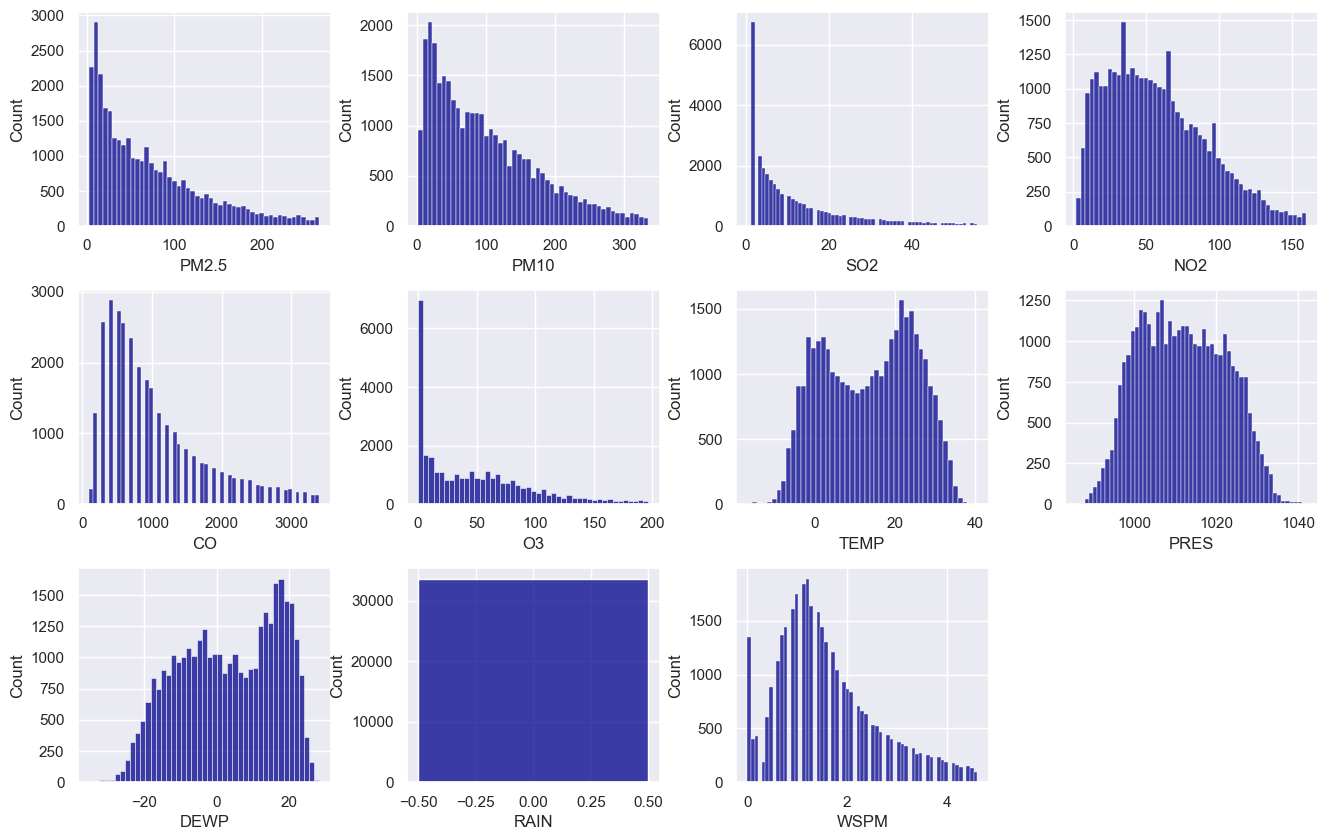

In [66]:
# 为什么需要检查数据异常值？
# 例如有一组学生数学成绩数据（百分制），却出现了负值和超过100的数值，这些就是典型的异常值
# 异常点的存在会扭曲数据集的数据分布，提高数据的不连贯性或使观测产生错误。
# 需要查看数据分布情况

def show_hist(data):
    sns.set_theme()
    fig = plt.figure(figsize=(16,10))
    for i in range(len(np.array(pm.columns))):
        ax = fig.add_subplot(3, 4, i+1)
        sns.histplot(data=data.iloc[:,i],ax=ax,color = 'darkblue')
        plt.subplots_adjust(wspace=0.3,hspace=0.3)
        
show_hist(pm)

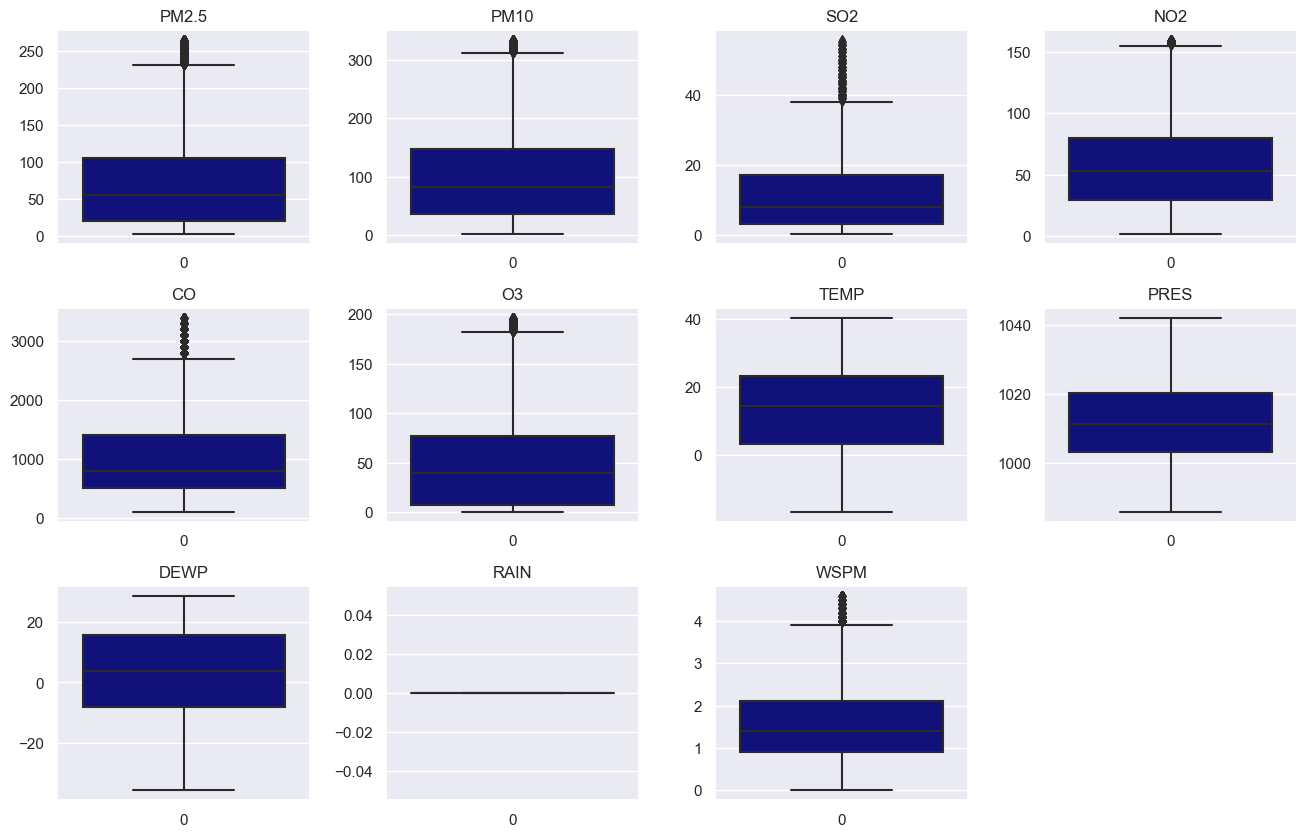

In [70]:
# 生成箱线图观察
def show_box(data):
    sns.set_theme()
    fig = plt.figure(figsize=(16,10))
    for i in range(len(np.array(data.columns))):
        ax = fig.add_subplot(3, 4, i+1)
        sns.boxplot(data=data.iloc[:,i],ax=ax,color = 'darkblue')
        ax.set_title(np.array(data.columns)[i])
        plt.subplots_adjust(wspace=0.3,hspace=0.3)
        
show_box(pm)

##### 3.1 标准差检测异常值

In [49]:
def Standard_deviation(data, new_data):
    for i in range(len(np.array(data.columns))):
        df_mean = data.iloc[:,i].mean()
        df_std = data.iloc[:,i].std()
        lower_limit = df_mean - 3*df_std
        upper_limit = df_mean + 3*df_std
        new_data.iloc[:,i] = data.iloc[:,i][(data.iloc[:,i]>lower_limit) & (data.iloc[:,i]<upper_limit)]

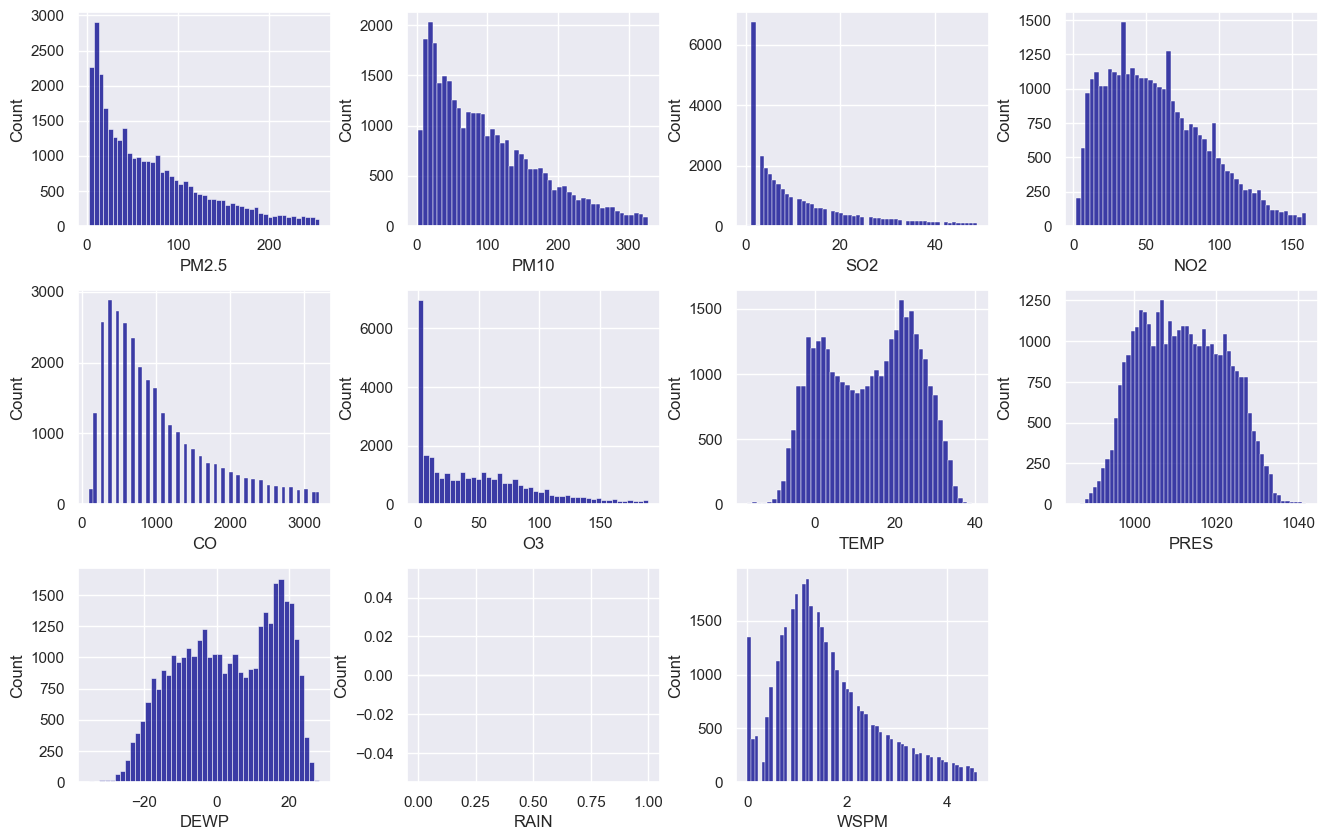

In [67]:
pm_sd = pm.copy()
Standard_deviation(pm, pm_sd)
show_hist(pm_sd)

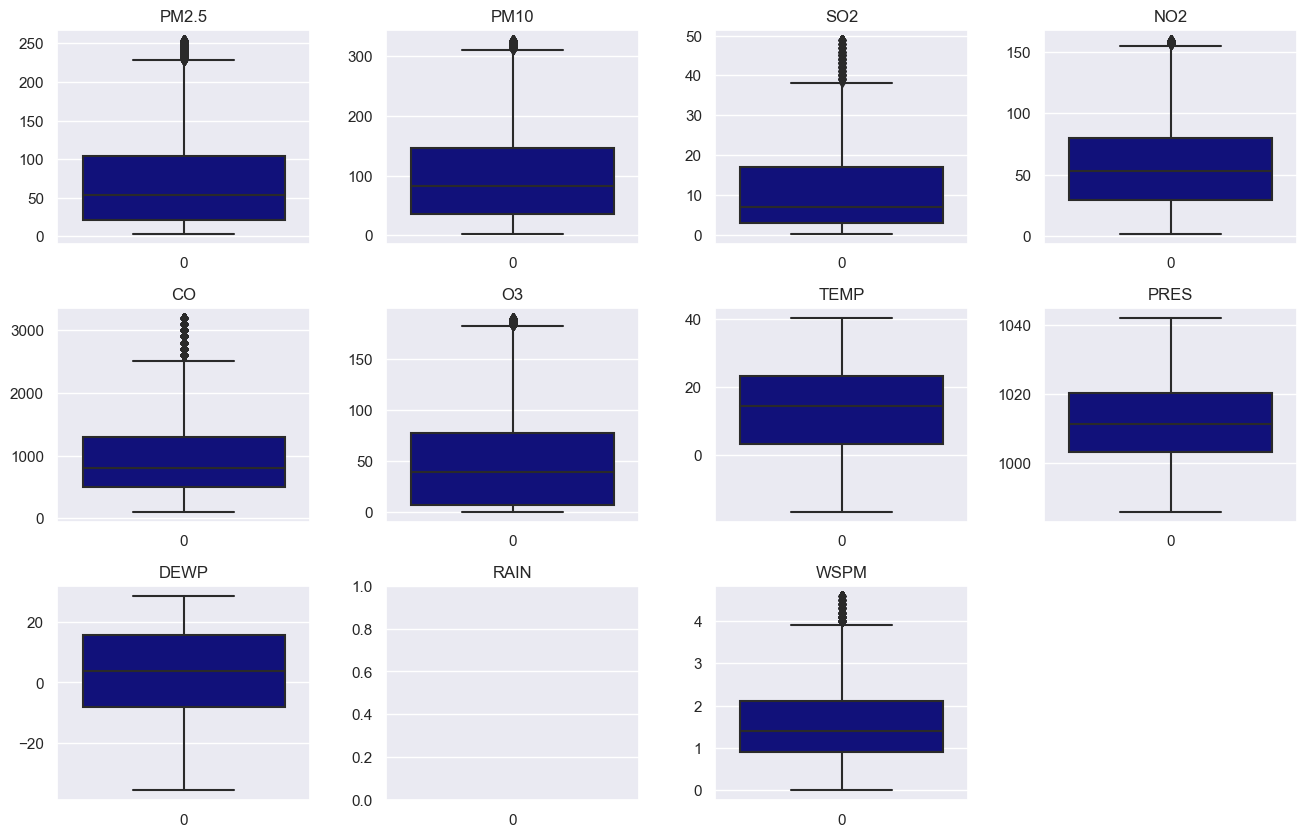

In [71]:
show_box(pm_sd)

##### 3.2 z-score检测异常值

In [51]:
# z = (x - μ)/σ
# μ为均值，σ为标准差
# 通过z-score检测异常值的方法其实等价于我们之前尝试过的通过标准差检测异常值的方法，上下阈值[lower_limit, upper_limit]可以理解为[-3, 3]
def z_score(data, new_data, limit):
    for i in range(len(np.array(data.columns))):
        df_mean = data.iloc[:,i].mean()
        df_std = data.iloc[:,i].std()
        df_zscore = (data.iloc[:,i]-df_mean)/df_std
        new_data.iloc[:,i] = data.iloc[:,i][df_zscore.abs()<limit]

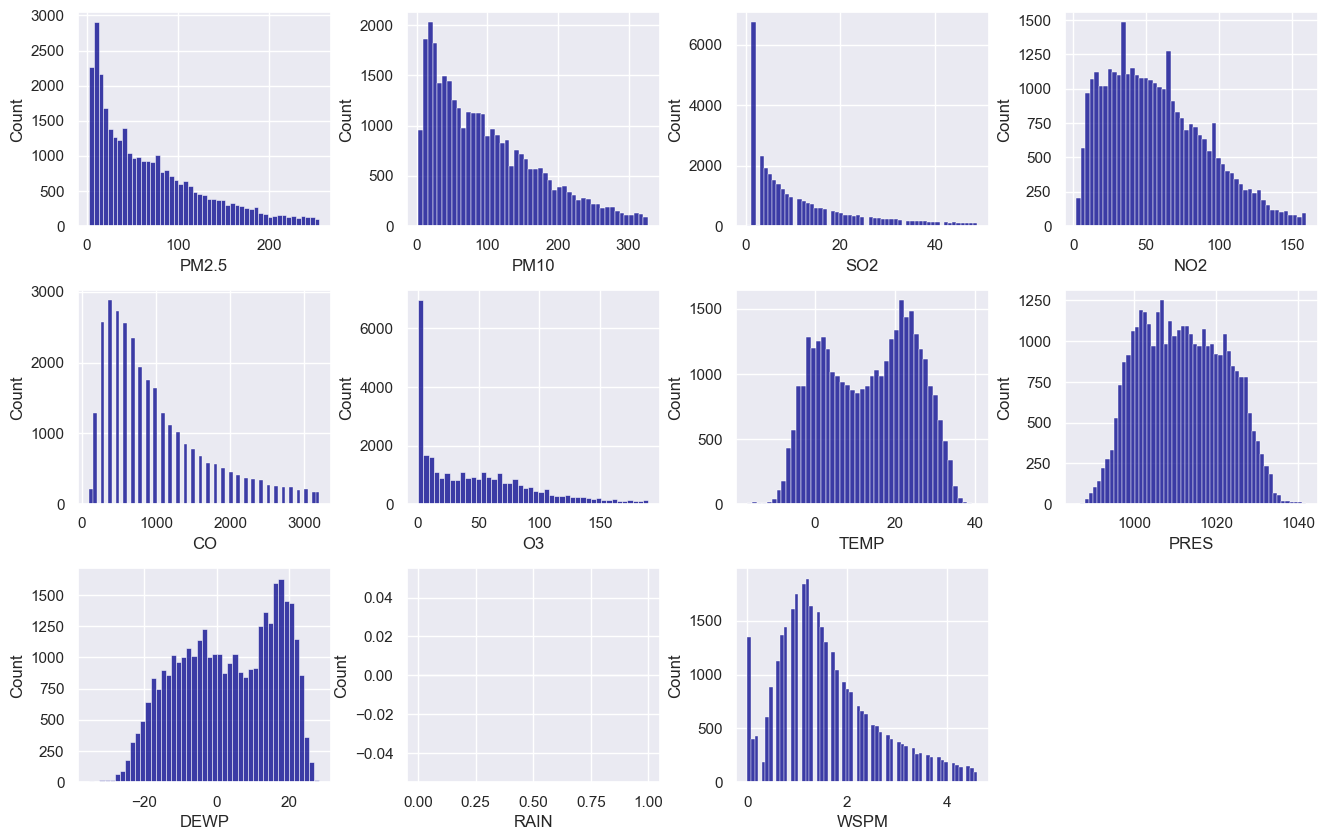

In [68]:
pm_zscore = pm.copy()
z_score(pm, pm_zscore, 3)
show_hist(pm_zscore)

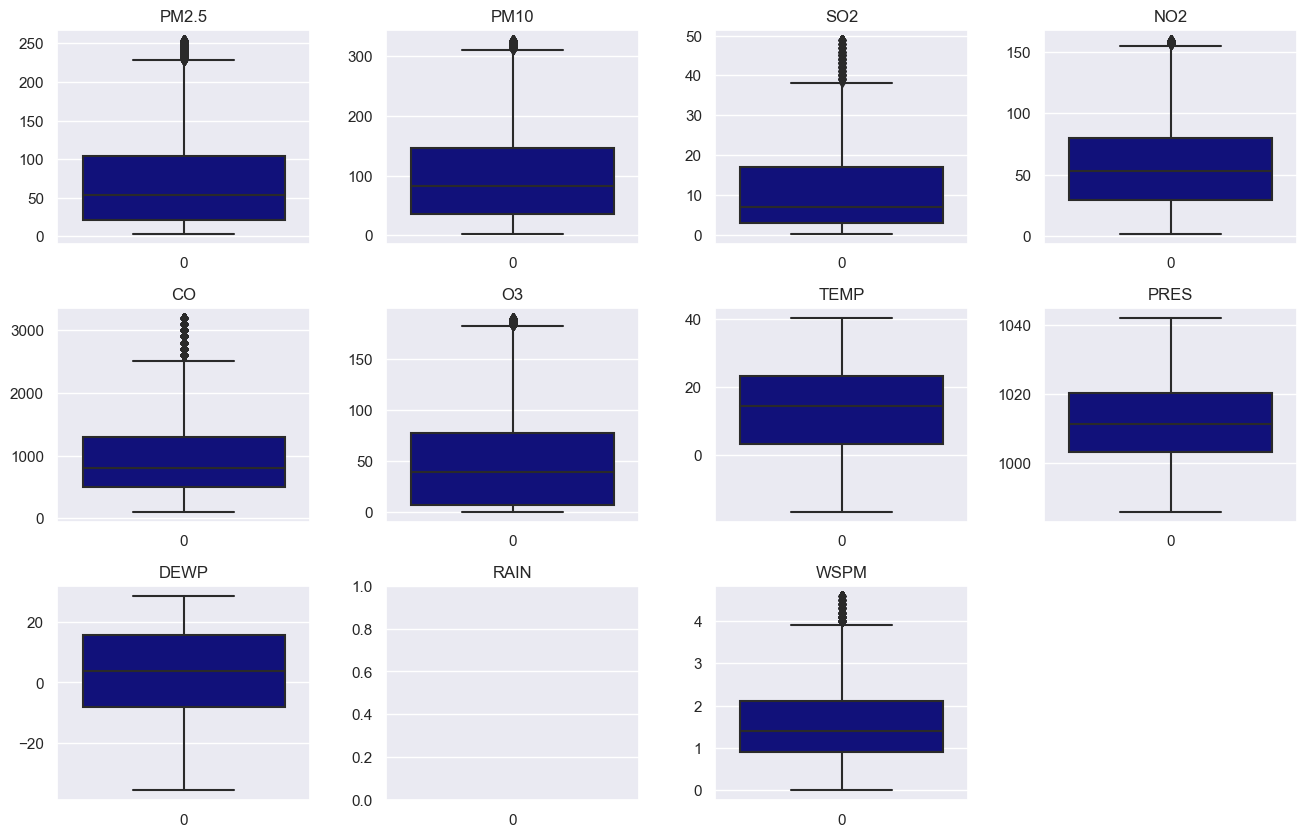

In [72]:
show_box(pm_zscore)

##### 3.3 四分位距(IQR)检测异常值

In [73]:
# 第一份位数又称为四分之一分位数或25%分位数，约定q25为第一分位数，这意味这数据集中有25%的数据点小于q25
# 第三份位数又称为四分之三分位数或75%分位数，约定q75为第三分位数，这意味这数据集中有75%的数据点大于q75
# IQR = q75 - q25
def IQR(data, new_data):
    for i in range(len(np.array(data.columns))):
        df_25 = data.iloc[:,i].quantile(0.25)
        df_75 = data.iloc[:,i].quantile(0.75)
        IQR = df_75 - df_25
        lower_limit = df_25 - 1.5*IQR
        upper_limit = df_75 + 1.5*IQR
        new_data.iloc[:,i] = data.iloc[:,i][(data.iloc[:,i]>lower_limit) & (data.iloc[:,i]<upper_limit)]

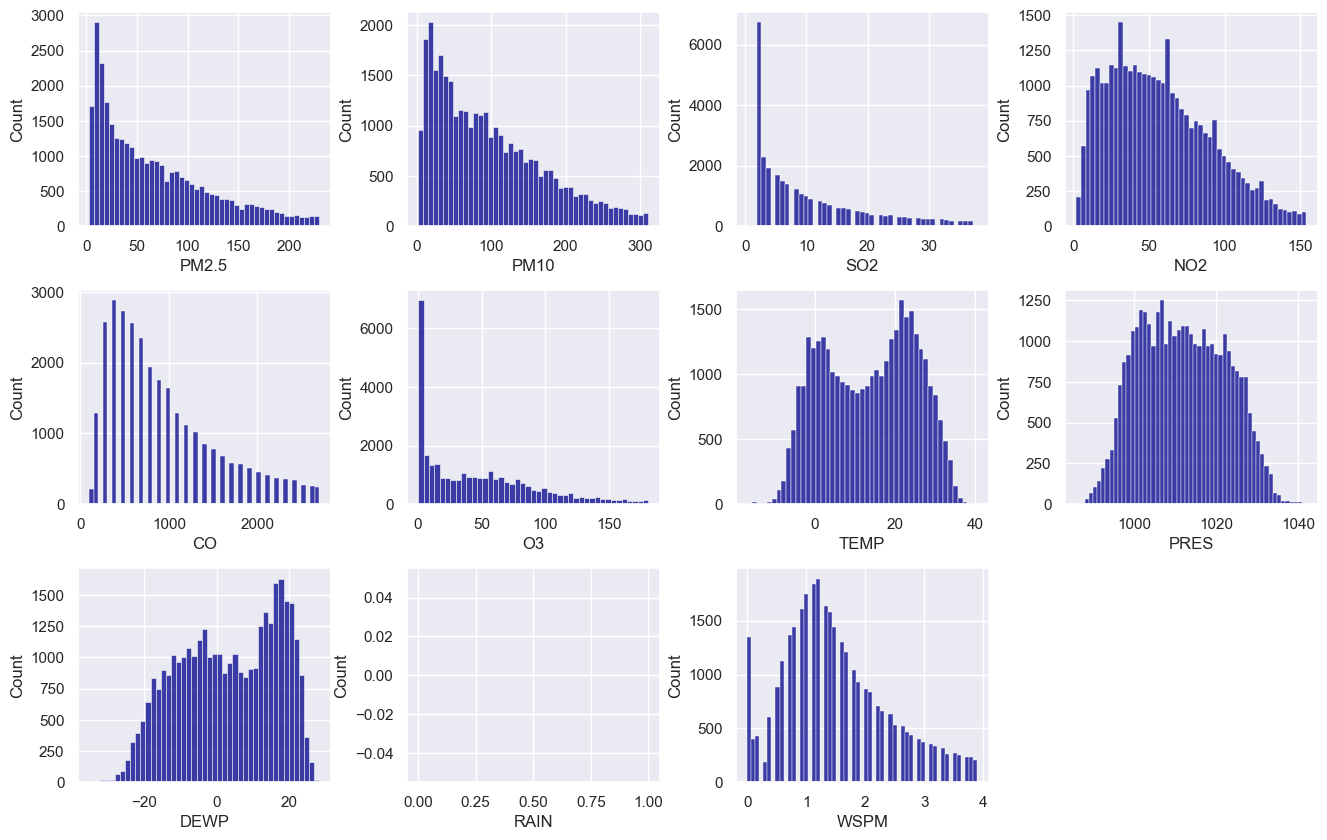

In [74]:
pm_IQR = pm.copy()
IQR(pm, pm_IQR)
show_hist(pm_IQR)

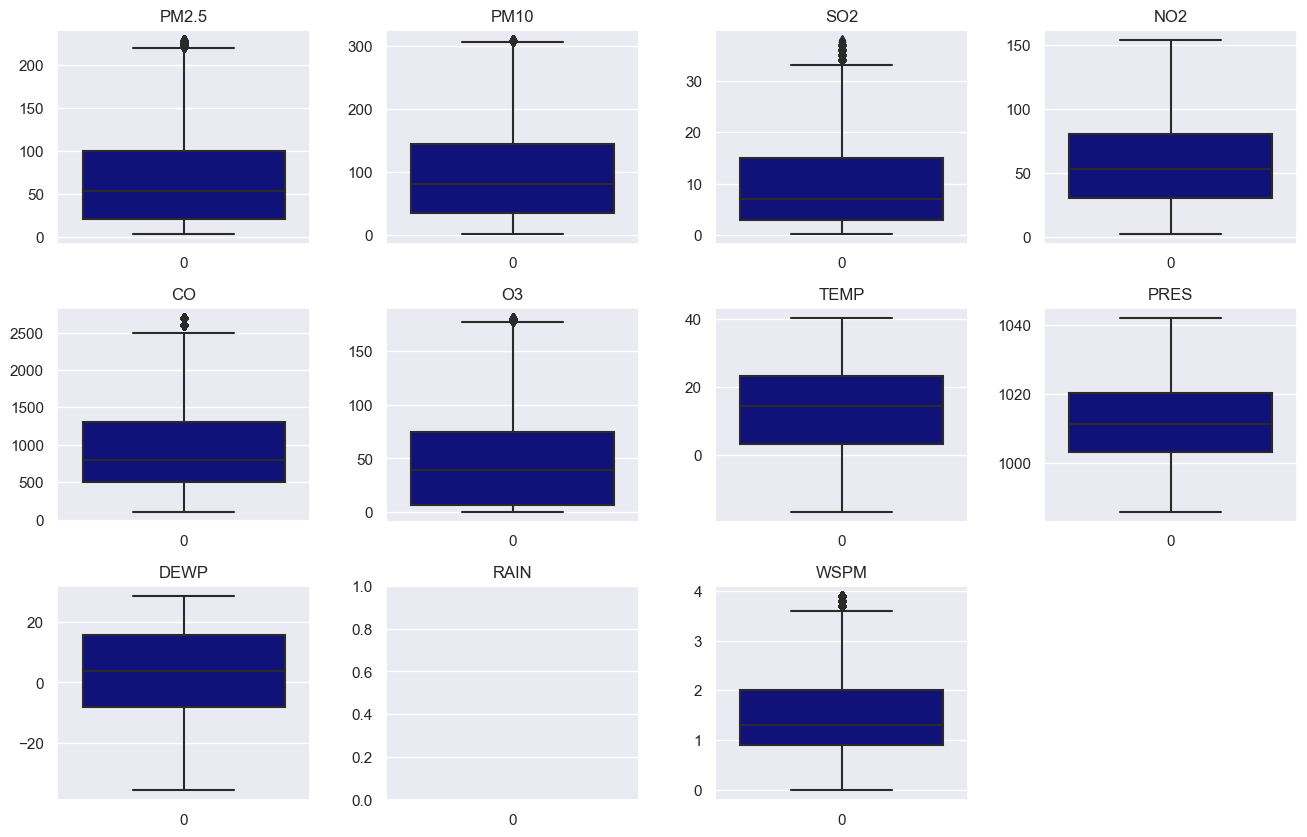

In [75]:
show_box(pm_IQR)

##### 3.4 百分位数检测异常值

In [96]:
def percentile(data, new_data, limit):
    for i in range(len(np.array(data.columns))):
        lower_limit, upper_limit = data.iloc[:,i].quantile([limit/100,(100-limit)/100])
        new_data.iloc[:,i] = data.iloc[:,i][(data.iloc[:,i]>lower_limit) & (data.iloc[:,i]<upper_limit)]

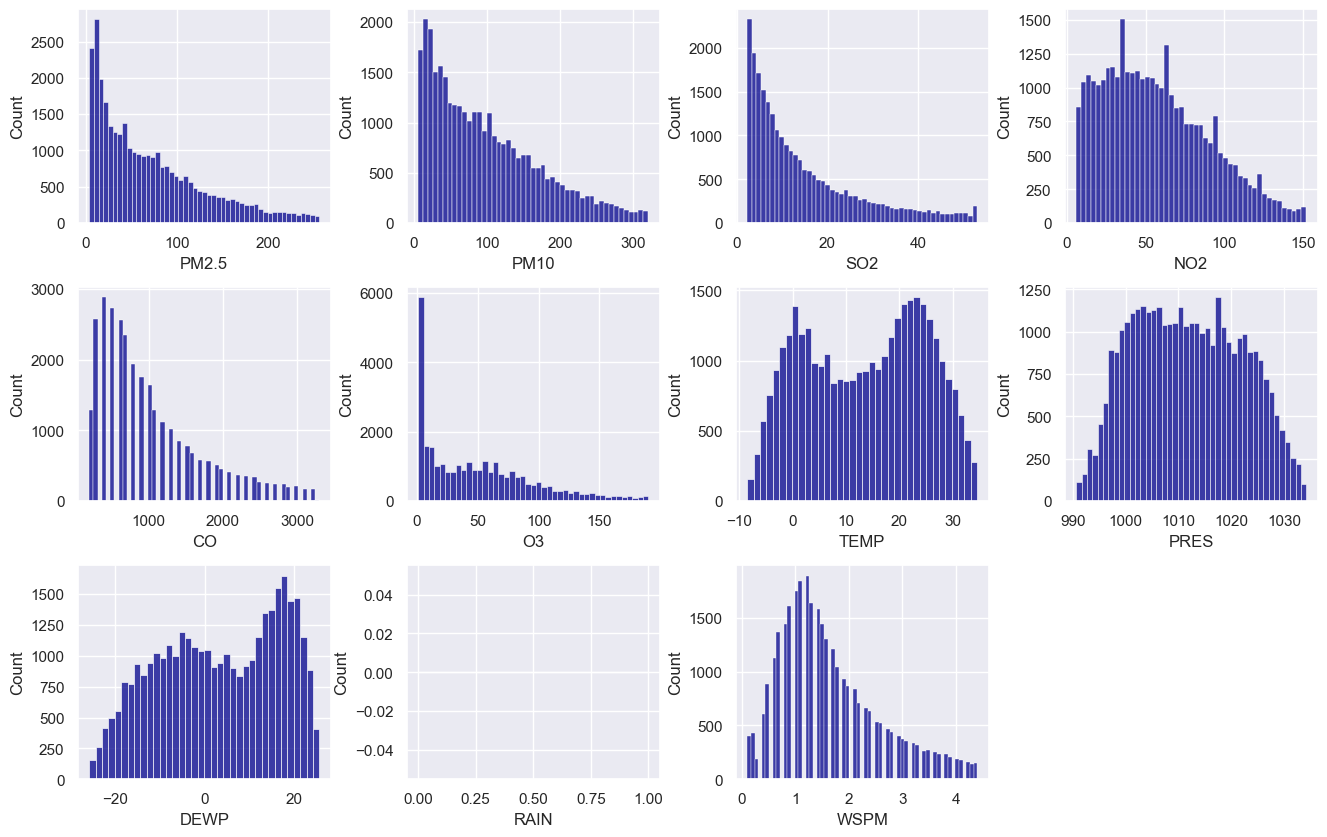

In [98]:
# 保留0.5百分位到99.5百分位
pm_percentile = pm.copy()
percentile(pm,pm_percentile,0.5)
show_hist(pm_percentile)

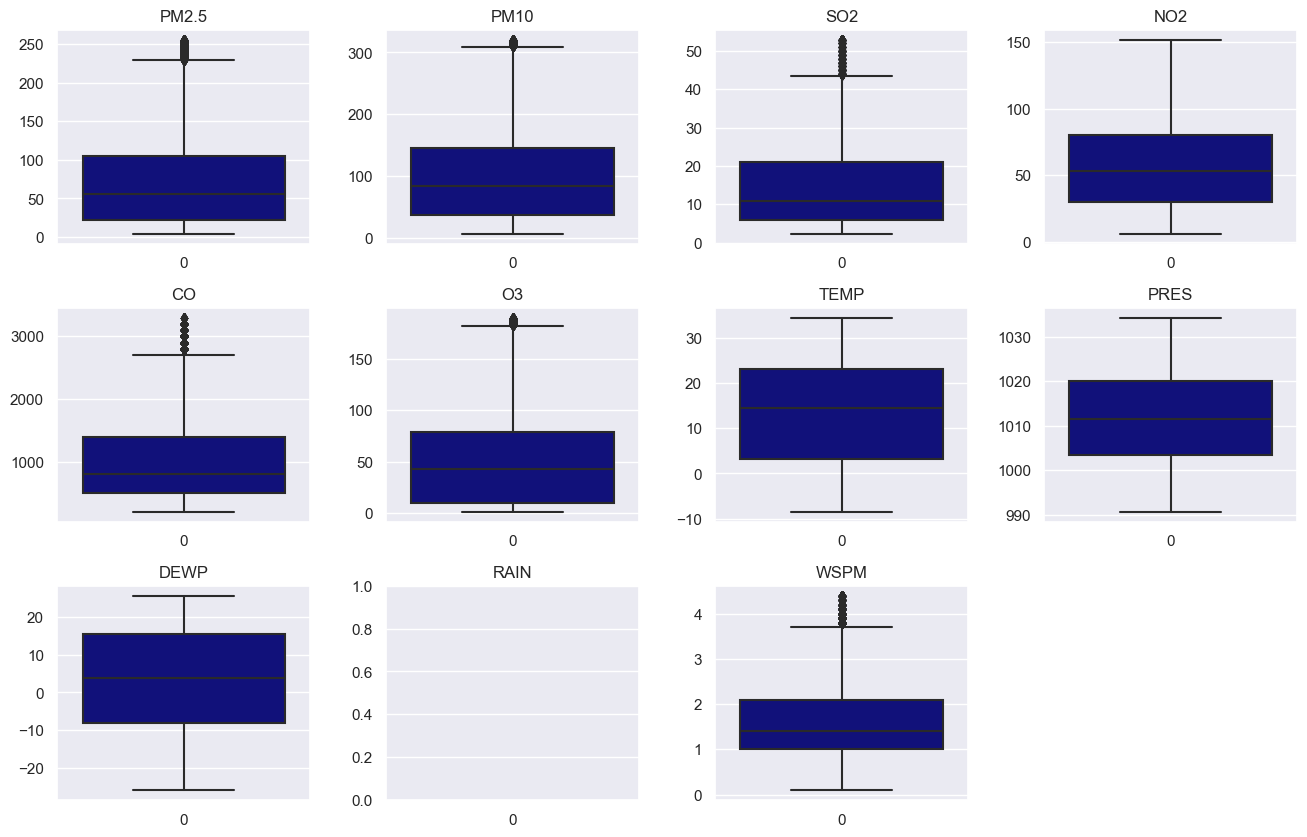

In [99]:
show_box(pm_percentile)

#### 4.检查数据完整性

In [12]:
#统计每一列的NAN
pm.isna().sum()

PM2.5     925
PM10      718
SO2       935
NO2      1023
CO       1776
O3       1719
TEMP       20
PRES       20
DEWP       20
RAIN       20
WSPM       14
dtype: int64

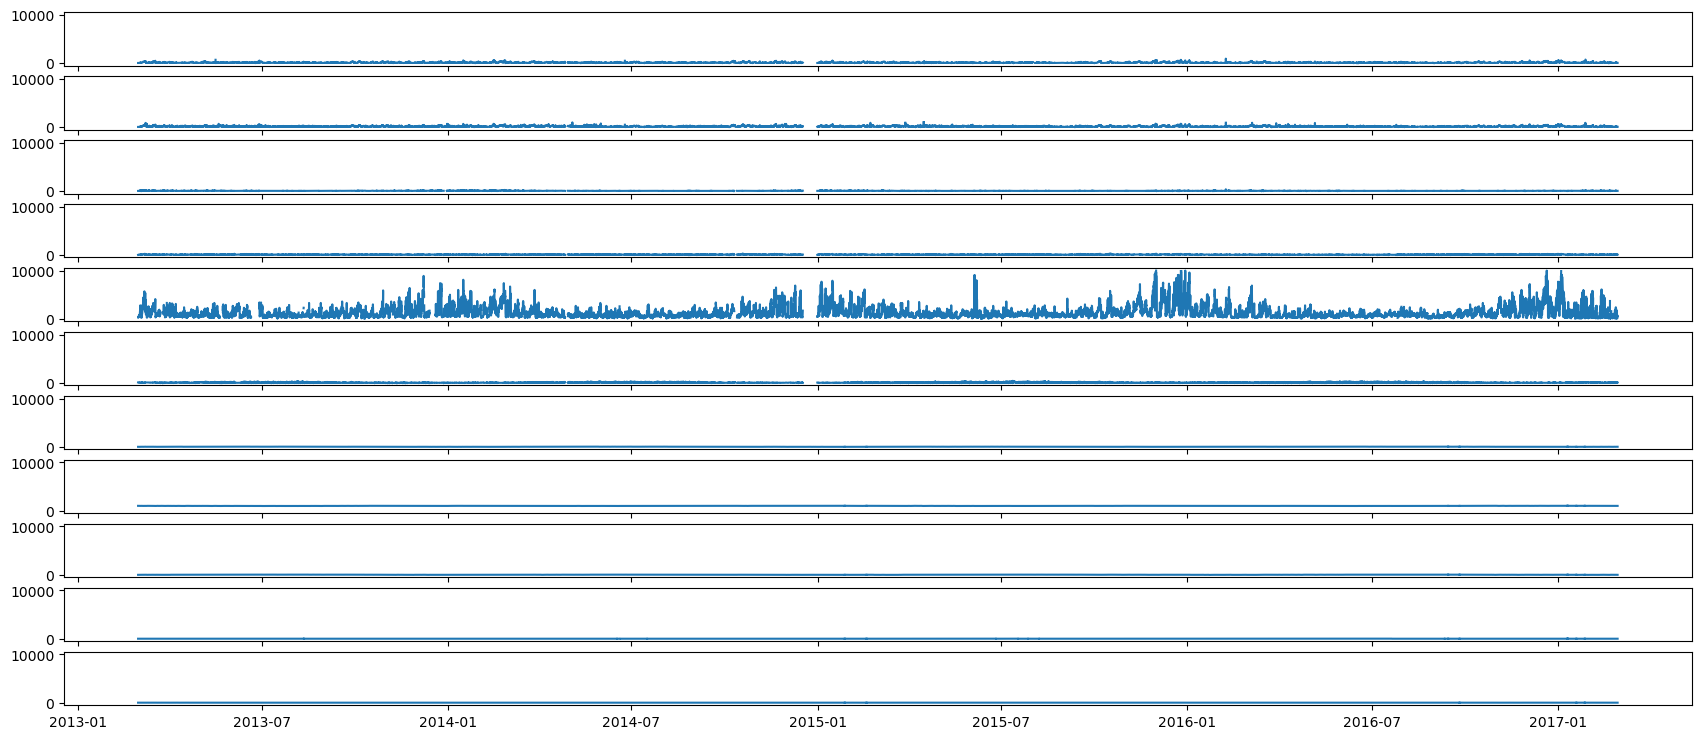

In [27]:
#画图展示数据(
fig, axes = plt.subplots(nrows=11, ncols=1, figsize=(21,9), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    ax.plot(np.array(pm.index), np.array(pm.iloc[:,i]))

#### 4.数据缺失值处理

##### 4.1删除所在行

In [14]:
# 直接删除整行数据会导致时间序列的不连续，对于小样本数据还会减少数据量，一般不建议使用
pm_drop = pm.dropna()

In [15]:
pm.index = pd.to_datetime(pm.index)

In [16]:
pm_drop.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013/3/1 0:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
2013/3/1 1:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2013/3/1 2:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
2013/3/1 3:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
2013/3/1 4:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0


In [17]:
pm_drop.isna().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

##### 4.2填充某一个非缺失值

In [18]:
# 用前一个非缺失值
pm_ffill = pm.fillna(method='ffill',axis=None,inplace=False)
pm_ffill.isna().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

In [19]:
# 用后一个非缺失值
pm_bfill = pm.fillna(method='bfill',axis=None,inplace=False)
pm_bfill.isna().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

In [20]:
# 使用最近的一个非缺失值
pm_nearest = pm.interpolate(method='nearest')
pm_nearest.isna().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

In [21]:
# 均值填充
pm_mean = pm.fillna(value=pm.mean())
# 中位数填充
pm_median = pm.fillna(value=pm.median())

##### 4.3线性插值

In [22]:
# 常用方法，简单且合理
pm_interpolate = pm.interpolate()

In [23]:
pm_interpolate.isna().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

##### 4.4三次样条插值

In [24]:
# DataFrame.interpolate函数详细用法请参照：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html
# https://blog.csdn.net/weixin_43887421/article/details/112508666
pm_spline = pm.interpolate(method='spline',order=3)

In [25]:
pm_spline

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,2.4
2017-02-28 20:00:00,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,0.9
2017-02-28 21:00:00,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,1.1
